# Classification Algorithms




## K - Neareast Neighbors

is a supervised learning algorithm. Where the data is 'trained' with data points corresponding to their classification. To predict the class of a given data point, it takes into account the classes of the 'K' nearest data points and chooses the class in which the majority of the 'K' nearest data points belong to as the predicted class.

* A method for classifying cases based on their similarity to other cases
* Cases that are near each other are said to be "Neighbors"
* Based on similar cases with same class labels are near each other

*Process algorithm*
1. Pick a value for K
2. Calculate the distance of unknown case from all cases
3. Select the k-observatins in the training data that are "nearest" to the unknown data point
4. Predict the response of the unknown data point using the most popular response value from the K-nearest neighbors

Similarity/Distance in a multidimensial space

$Dis(x_1, x_2) = \sqrt{\sum_{i = 0}^{n}{(x_{1i} - x_{2i})^2}}$

## Classification Accuracy

**Jaccard index**

* $y$ :Actual labels
* $\hat{y}$: Predicted labels

$J(y, \hat{y}) = \frac{|y \cap \hat{y}|}{|y \cup \hat{y}|} = 
\frac{|y \cap \hat{y}|}{|y| + |\hat{y}| + |y \cap \hat{y}|}$

$J(y, \hat{y}) = 1.0$ --> Higher Accuracy

**F1-score**
* Precision = $TP = \frac{TP}{TP + FP}$
* Recall = $\frac{TP}{TP + FN}$
* F1-score = $2x \frac{prc * rec}{prc+ rec} == 1.0$ Higher accuracy

**Log loss**
Performance of a classifier where the predicted output is a probability value between 0 and 1

$LogLoss = -\frac{1}{n}\sum{(y log(\hat{y})) + (1 - y)log(1-\hat{y})}$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

**The dataset**

magine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset, with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

The target field, called custcat, has four possible values that correspond to the four customer groups, as follows: 
* 1- Basic Service 
* 2- E-Service 
* 3- Plus Service 
* 4- Total Service

In [2]:
!wget -O teleCust1000t.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv

--2021-11-13 20:05:26--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36047 (35K) [text/csv]
Saving to: ‘teleCust1000t.csv’

teleCust1000t.csv   100%[===================>]  35.20K  --.-KB/s    in 0.02s   

2021-11-13 20:05:26 (2.15 MB/s) - ‘teleCust1000t.csv’ saved [36047/36047]



In [3]:
df = pd.read_csv("teleCust1000t.csv")
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [5]:
df.shape

(1000, 12)

In [6]:
df.dtypes

region       int64
tenure       int64
age          int64
marital      int64
address      int64
income     float64
ed           int64
employ       int64
retire     float64
gender       int64
reside       int64
custcat      int64
dtype: object

In [7]:
df.isnull().sum()

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

In [8]:
df.corr()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
region,1.000000,0.016388,0.015034,-0.080637,0.010320,0.023765,-0.057952,0.016335,0.005595,0.050596,-0.065158,-0.023771
tenure,0.016388,1.000000,0.490217,0.154171,0.522952,0.242912,-0.109797,0.520288,0.171143,0.023533,-0.036592,0.166691
age,0.015034,0.490217,1.000000,-0.014433,0.660435,0.327948,-0.154857,0.670047,0.429440,-0.011419,-0.254993,0.056909
marital,-0.080637,0.154171,-0.014433,1.000000,-0.012051,-0.043984,0.001400,-0.002891,-0.078109,0.008345,0.625999,0.083836
address,0.010320,0.522952,0.660435,-0.012051,1.000000,0.226781,-0.128330,0.463291,0.292503,0.008363,-0.201645,0.067913
income,0.023765,0.242912,0.327948,-0.043984,0.226781,1.000000,0.113939,0.516349,-0.083651,0.038706,-0.097591,0.134525
ed,-0.057952,-0.109797,-0.154857,0.001400,-0.128330,0.113939,1.000000,-0.228580,-0.114229,0.006704,0.021045,0.193864
employ,0.016335,0.520288,0.670047,-0.002891,0.463291,0.516349,-0.228580,1.000000,0.277401,0.046016,-0.134683,0.110011
retire,0.005595,0.171143,0.429440,-0.078109,0.292503,-0.083651,-0.114229,0.277401,1.000000,0.053906,-0.140120,0.008908
gender,0.050596,0.023533,-0.011419,0.008345,0.008363,0.038706,0.006704,0.046016,0.053906,1.000000,0.016556,-0.004966


**Data visualization & analysis**

In [13]:
print("Types of customer: {}".format(df["custcat"].unique()))
print("# of each type of customer: \n{}".format(df["custcat"].value_counts()))

Types of customer: [1 4 3 2]
# of each type of customer: 
3    281
1    266
4    236
2    217
Name: custcat, dtype: int64


* 1- Basic Service -- 266  
* 2- E-Service      -- 217
* 3- Plus Service  -- 281
* 4- Total Service -- 236

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7233b56a50>]],
      dtype=object)

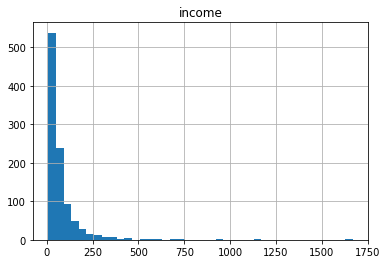

In [16]:
df.hist(column = "income", bins = 40)

**Feature set**

In [17]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [18]:
#Convert the data df to np.array to use scikit learn
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']].values
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [22]:
y = df["custcat"].values
y[0:5]

array([1, 4, 3, 1, 3])

In [23]:
from sklearn.preprocessing import StandardScaler

In [25]:
standard = StandardScaler()
X = standard.fit_transform(X)
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4)
print("The shape of the training data X: {}, y: {}".format(X_train.shape, y_train.shape))
print("The shape of the test data X: {}, y: {}".format(X_test.shape, y_test.shape))

The shape of the training data X: (750, 11), y: (750,)
The shape of the test data X: (250, 11), y: (250,)


**Classification**

*KNN - K - Nearest Neighbor*

In [28]:
from sklearn.neighbors import KNeighborsClassifier

Let's try the algorithm with k = 4


**Training**

In [29]:
k = 4
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train, y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

**Testing**

In [32]:
y_hat_knn = knn.predict(X_test)
print("The real values of the test dataset:   {}".format(y_test[0:5]))
print("The prediction with the KNN algorithm: {}".format(y_hat_knn[0:5]))

The real values of the test dataset:   [4 1 1 2 4]
The prediction with the KNN algorithm: [1 1 3 2 4]


**Accuracy evaluation**

In [33]:
from sklearn import metrics

In [36]:
print("Train set accuracy: {}".format(metrics.accuracy_score(y_train, knn.predict(X_train))))
print("Test set accuracy:  {}".format(metrics.accuracy_score(y_test, y_hat_knn)))

Train set accuracy: 0.5413333333333333
Test set accuracy:  0.332


let's try with K = 6

In [38]:
k = 6
knn_2 = KNeighborsClassifier(n_neighbors = k)
knn_2.fit(X_train, y_train)

y_hat_knn_2 = knn_2.predict(X_test)
print("The real values of the test dataset:   {}".format(y_test[0:5]))
print("The prediction with the KNN algorithm: {}".format(y_hat_knn_2[0:5]))

print("Train set accuracy: {}".format(metrics.accuracy_score(y_train, knn_2.predict(X_train))))
print("Test set accuracy:  {}".format(metrics.accuracy_score(y_test, y_hat_knn_2)))

The real values of the test dataset:   [4 1 1 2 4]
The prediction with the KNN algorithm: [3 3 3 4 4]
Train set accuracy: 0.5173333333333333
Test set accuracy:  0.316


K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the user. So, how can we choose right value for K?
The general solution is to reserve a part of your data for testing the accuracy of the model. Then choose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different values of k.


In [39]:
Ks = 10
mean_acc = np.zeros((Ks - 1))
std_acc = np.zeros((Ks - 1))

for n in range(1, Ks):
  knn = KNeighborsClassifier(n_neighbors = n)
  knn.fit(X_train, y_train)
  y_hat = knn.predict(X_test)
  mean_acc[n - 1] = metrics.accuracy_score(y_test, y_hat)
  std_acc[n - 1] = np.std(y_hat == y_test) / np.sqrt(y_hat.shape[0])

mean_acc


array([0.296, 0.3  , 0.304, 0.332, 0.34 , 0.316, 0.356, 0.332, 0.356])

plot the model with different k 

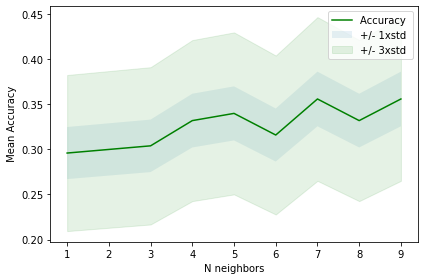

In [45]:
plt.plot(range(1, Ks), mean_acc ,color = "g")
plt.fill_between(range(1, Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha = 0.1)
plt.fill_between(range(1, Ks), mean_acc - 3 * std_acc, mean_acc + 3 * std_acc, alpha = 0.1, color = "g")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.xlabel("N neighbors")
plt.ylabel(" Mean Accuracy")
plt.tight_layout()
plt.show()

In [47]:
print( "The best accuracy was with", mean_acc.max(), "with k =", mean_acc.argmax()+1) 

The best accuracy was with 0.356 with k = 7
